In [10]:
# Import libraries

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
#matplotlib.use('qtagg')
import xarray as xr
import numpy as np
from netCDF4 import Dataset
#import IPython.display
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cft
#import cosima_cookbook as cc
#import cosima-cookbook as cc
#from mpl_toolkits.basemap import Basemap
#import basemap as bs
from os import listdir
from os.path import isfile, join
import math
import time
import sys


### Functions


In [5]:
def get_lat_idx(lat, region):
    '''
    Get a list of variables associated with a pre-defined name.
    '''
    if region == 'Antarctic':
        idx = lat < -50
    elif region == 'Arctic':
        idx = lat > 45
    elif region == 'SH':
        idx = lat < 0
    elif region == 'NH':
        idx = lat > 0
    return idx

def get_var_list(list_name):
    '''
    Get a list of variables associated with a pre-defined name.
    '''
    if list_name == 'ocn':
        var_list = ['sst','sss','uocn','vocn','frzmlt']
    elif list_name == 'atmo':
        var_list = ['Tair','uatm','vatm','fswdn','flwdn','snow']
    elif list_name == 'wave':
        var_list = ['aice','wave_sig_ht','peak_period','mean_wave_dir']
    elif list_name == 'ice':
        var_list = ['aice','hi','fsdrad','iage','uvel','vvel','frazil','congel']
    elif list_name == 'JRA55':
         var_list = ['airtmp']
    else:
        var_list = [list_name]

    
    return var_list


def get_proj_info(region):
    '''
    Get a the projection and coordinate limits relevant for the particular region.
    '''
    if region == "south":
        projection = ccrs.SouthPolarStereo()
        coord_lims = [-180, 180, -40, -90]
    elif region == "north":
        projection = ccrs.NorthPolarStereo()
        coord_lims = [-180, 180, 50, 90]
    else:
        projection = ccrs.Robinson()
        coord_lims = [-180, 180, -90, 90]
        # ccrs.SouthPolarStereo()
        # ccrs.Robinson()

    return projection, coord_lims


def plot_map(ax,exp,ds,LN,LT,region):
    '''
    Plot a map.
    '''


    projection, coord_lims = get_proj_info(region)
    land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                            edgecolor='black', facecolor='gray', linewidth=0.5)
    ax.coastlines(resolution='50m')
    ax.add_feature(land_50m)
    ax.set_extent(coord_lims, ccrs.PlateCarree())
    #gl = ax.gridlines(draw_labels=False)

    if  exp == 'vatm' or exp == 'uatm' or exp == 'uvel' or exp == 'vvel':
#        plot_data = ds[exp][0,:,:]
#        idx = plot_data > -2.0
#        print(idx.shape)
#        print(plot_data.shape)
        #plot_data = plot_data*float(idx)#np.multiply(plot_data,float(idx))
        #plot_data[idx] = 0#float("NAN")
        #print(min(ds[exp][0,:,:]))
       # if min(ds[exp][0,:,:]) < -2*(10**6):
       #     p1 = ax.pcolormesh(LN,LT,ds[exp][0,:,:], 
       #                         transform=ccrs.PlateCarree(),
       #                         cmap='RdBu_r',  vmin=-0.5, vmax=0.5)
       # else:
        p1 = ax.pcolormesh(LN,LT,ds[exp][0,:,:], 
                        transform=ccrs.PlateCarree(),
                        cmap='RdBu_r',  norm=colors.CenteredNorm()) #
        #end
                            #,norm=colors.CenteredNorm())
    elif exp == 'uocn' or exp == 'vocn': 
        p1 = ax.pcolormesh(LN,LT,ds[exp][0,:,:], 
                        transform=ccrs.PlateCarree(),
                        cmap='RdBu_r',  vmin=-0.5, vmax=0.5)

    elif exp == 'aice':
        p1 = ax.pcolormesh(LN,LT,ds[exp][0,:,:], 
                        transform=ccrs.PlateCarree(),
                        cmap=cmo.ice,  vmin=0, vmax=1) #norm=colors.CenteredNorm())
    elif exp == 'sst' or exp == 'Tair' or exp == 'frzmlt': 
        p1 = ax.pcolormesh(LN,LT,ds[exp][0,:,:], 
                        transform=ccrs.PlateCarree(),
                        cmap=cmo.thermal)
    elif exp == 'sss':
        p1 = ax.pcolormesh(LN,LT,ds[exp][0,:,:], 
                        transform=ccrs.PlateCarree(),
                        cmap=cmo.delta)
    else:
        p1 = ax.pcolormesh(LN,LT,ds[exp][0,:,:], 
                        transform=ccrs.PlateCarree())

    cb = plt.colorbar(p1, orientation='vertical')
    fontsize = 6
    cb.ax.set_ylabel( ds[exp].attrs["long_name"].partition(' of ')[0] + ' [' +  ds[exp].attrs["units"] + ']' , size=fontsize);
    cb.ax.tick_params(labelsize=fontsize) 
    #ax_cb = plt.axes([0.85, 0.15, 0.03, 0.7])
    #cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical')
    #ax_cb = plt.axes([0.85, 0.15, 0.03, 0.7])

    return ax

def ProgressBar(Total, Progress, BarLength=20, ProgressIcon="#", BarIcon="-"):
    try:
        # You can't have a progress bar with zero or negative length.
        if BarLength <1:
            BarLength = 20
        # Use status variable for going to the next line after progress completion.
        Status = ""
        # Calcuting progress between 0 and 1 for percentage.
        Progress = float(Progress) / float(Total)
        # Doing this conditions at final progressing.
        if Progress >= 1.:
            Progress = 1
            Status = "\r\n"    # Going to the next line
        # Calculating how many places should be filled
        Block = int(round(BarLength * Progress))
        # Show this
        Bar = "[{}] {:.0f}% {}".format(ProgressIcon * Block + BarIcon * (BarLength - Block), round(Progress * 100, 0), Status)
        return Bar
    except:
        return "ERROR"


def ShowBar(Bar):
    sys.stdout.write(Bar)
    sys.stdout.flush()

    

# Main script




Plotting:
Progress: [....................] 0% Saving figure...


/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


Image saved!


/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


<Figure size 640x480 with 0 Axes>

/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


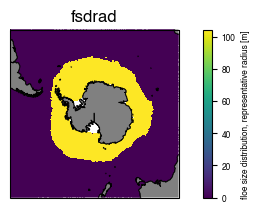

In [8]:
case = 'access-om2_025'
date = '2003-01'
filename =  '/Users/noahday/GitHub/cice-dirs/runs/access-om2_025/history/iceh_inst.2003-01-01-03600.nc' 
ds = xr.open_dataset(filename)
plt.figure() #figsize=(15,8))
LN = ds.TLON.values
LT = ds.TLAT.values

var_name = 'fsdrad'
    # 'ice', 'ocn', 'atmo', 'wave'
variable_list = get_var_list(var_name)
hemisphere = "south"


plt.rcParams.update({
        "text.usetex": False,
        "font.family": "Helvetica"#"Computer Modern Roman"
    })

#filename = '/g/data/dy43/cice-dirs/runs/nowaves/history/iceh.2003-02-14.nc'
ds = xr.open_dataset(filename)
plt.figure() #figsize=(15,8))
#LN = ds.LON.values
#LT = ds.LAT.values
projection, coord_lims = get_proj_info(hemisphere)
print('Plotting:')


for counter, exp in enumerate(variable_list):
    progressBar = "\rProgress: " + ProgressBar(len(variable_list), counter, 20, '#', '.')
    ShowBar(progressBar)
    ax = plt.subplot(2, math.ceil(len(variable_list)/2), counter+1, projection=projection, label='{0}'.format(counter))
    #print('     ' + exp)
    ax= plot_map(ax,exp,ds,LN,LT,hemisphere)
    ax.set_title(variable_list[counter])

   


print('Saving figure...')
temp = filename.partition('.')[2]
plt.savefig(date+'_'+var_name+'-'+hemisphere+'.png', dpi = 300)  
print('Image saved!')


In [ ]:
print(matplotlib.font_manager.get_font_names())

['Gurmukhi Sangam MN', 'System Font', 'Noto Nastaliq Urdu', 'Noto Sans Ol Chiki', 'Party LET', 'Big Caslon', 'Webdings', 'Chalkboard SE', 'STIXSizeOneSym', 'Noto Sans Mende Kikakui', 'Palatino', 'Noto Sans Meroitic', 'STIXNonUnicode', 'Noto Sans Phoenician', 'Phosphate', 'Lucida Grande', 'Noto Sans Khojki', 'Noto Sans Inscriptional Parthian', 'DejaVu Serif Display', 'Marker Felt', 'Noto Sans Tifinagh', 'Noto Sans Oriya', 'Arial Hebrew', 'Mshtakan', 'Noto Sans Siddham', 'Athelas', 'Symbol', 'Diwan Thuluth', 'Krungthep', 'Al Tarikh', 'Heiti TC', 'Noto Sans Syloti Nagri', 'Noto Sans Osage', 'STIXGeneral', 'Nadeem', 'Noto Sans Warang Citi', 'Rockwell', 'Menlo', 'Euphemia UCAS', 'Kannada Sangam MN', 'Arial', 'STIXSizeFiveSym', 'Noto Sans Marchen', 'New Peninim MT', 'Skia', 'Noto Serif Ahom', 'Raanana', 'Noto Sans Lepcha', 'Charter', 'DecoType Naskh', 'Noto Sans Newa', 'Noto Sans Gothic', 'cmss10', 'Muna', 'Noto Sans Tai Tham', 'Noto Sans Sundanese', 'Noto Sans Coptic', 'STIXSizeFourSym', 'N